In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=136f0e5556086e13a917c3a6bea68466730e0d0a20593a20453ce080f12a7329
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Número de qubits: 4, Estado a ser encontrado: '1011', Iterações: 3

Resultados da Medição:


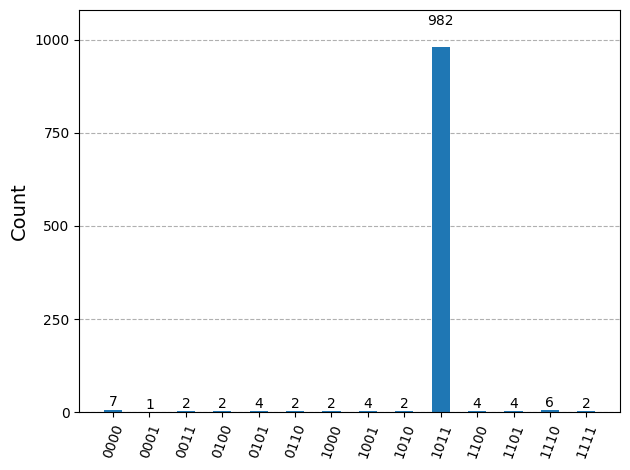

In [2]:
# Instalação das bibliotecas necessárias (se ainda não as tiver)
# !pip install qiskit
# !pip install qiskit-aer
# !pip install pylatexenc matplotlib

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # CORREÇÃO 1: Importar AerSimulator de qiskit_aer
from qiskit.visualization import plot_histogram

def initialize_s(qc, qubits):
    """Aplica uma porta Hadamard a todos os qubits."""
    for q in qubits:
        qc.h(q)
    return qc

def oracle(qc, marked_state):
    """Implementa o oráculo que marca o estado desejado."""
    # Inverte as portas X para os qubits que são 0 no estado marcado
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            qc.x(i)

    # Aplica a porta multi-controlada Z
    qc.mcp(np.pi, list(range(len(marked_state) - 1)), len(marked_state) - 1)

    # Desfaz a inversão das portas X
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            qc.x(i)
    return qc

def diffuser(qc, qubits):
    """Implementa o operador de difusão de Grover."""
    n = len(qubits)
    # Aplica Hadamard a todos os qubits
    for q in qubits:
        qc.h(q)
    # Aplica portas X a todos os qubits
    for q in qubits:
        qc.x(q)

    # Aplica a porta multi-controlada Z
    qc.mcp(np.pi, list(range(n - 1)), n - 1)

    # Desfaz as portas X
    for q in qubits:
        qc.x(q)
    # Desfaz as portas Hadamard
    for q in qubits:
        qc.h(q)
    return qc

def grover_algorithm(n_qubits, marked_state):
    """Constrói o circuito completo do Algoritmo de Grover."""
    qubits = list(range(n_qubits))
    qc = QuantumCircuit(n_qubits)

    # Número ótimo de iterações
    iterations = int(np.round(np.pi / 4 * np.sqrt(2**n_qubits)))
    print(f"Número de qubits: {n_qubits}, Estado a ser encontrado: '{marked_state}', Iterações: {iterations}")

    # 1. Inicialização
    initialize_s(qc, qubits)

    # 2. Aplicação do Oráculo e Difusor
    for _ in range(iterations):
        oracle(qc, marked_state)
        diffuser(qc, qubits)

    qc.measure_all()
    return qc

# --- Execução do Algoritmo ---
n_qubits = 4
marked_state = '1011'
grover_circuit = grover_algorithm(n_qubits, marked_state)

# Visualização do circuito (opcional)
# print("\nCircuito Quântico de Grover:")
# print(grover_circuit)

# Execução em um simulador quântico
backend = AerSimulator() # CORREÇÃO 2: Chamar o AerSimulator diretamente
t_qc = transpile(grover_circuit, backend)
result = backend.run(t_qc, shots=1024).result()
counts = result.get_counts()


# Plotar os resultados
print("\nResultados da Medição:")
plot_histogram(counts)

In [ ]:
# Instalação (caso necessário)
!pip install --upgrade qiskit qiskit-aer pylatexenc matplotlib

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

def oracle(qc, marked_state):
    # Marca o estado 'marked_state'
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            qc.x(i)
    qc.mcp(np.pi, list(range(len(marked_state)-1)), len(marked_state)-1)
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            qc.x(i)
    return qc

def diffuser(qc, qubits):
    n = len(qubits)
    for q in qubits:
        qc.h(q)
        qc.x(q)
    qc.mcp(np.pi, list(range(n-1)), n-1)
    for q in qubits:
        qc.x(q)
        qc.h(q)
    return qc

def build_grover_circuit(n_qubits, marked_state):
    qubits = list(range(n_qubits))
    qc = QuantumCircuit(n_qubits)
    iterations = int(np.round(np.pi/4 * np.sqrt(2**n_qubits)))
    initialize_s(qc, qubits)
    for _ in range(iterations):
        oracle(qc, marked_state)
        diffuser(qc, qubits)
    qc.measure_all()
    return qc

# --- Loop de teste de capacidade ---
backend = AerSimulator()
max_supported = 0

for n in range(2, 40):      # tenta de 2 até 39 qubits
    marked = '0' * (n-1) + '1'  # exemplo: marca sempre o estado ...001
    try:
        qc = build_grover_circuit(n, marked)
        tcirc = transpile(qc, backend)
        job = backend.run(tcirc, shots=512)
        result = job.result()  # se aqui tudo OK, continua
        print(f"✅ n_qubits = {n}: OK ({result.get_counts()})")
        max_supported = n
    except Exception as e:
        print(f"❌ n_qubits = {n}: ERRO → {e}")
        break

print(f"\n► Maior número de qubits suportado localmente: {max_supported}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
✅ n_qubits = 2: OK ({'11': 112, '00': 133, '10': 147, '01': 120})
✅ n_qubits = 3: OK ({'110': 4, '010': 2, '000': 2, '101': 5, '111': 4, '011': 5, '100': 2, '001': 488})
✅ n_qubits = 4: OK ({'0001': 494, '1111': 1, '0110': 2, '1101': 1, '0111': 1, '0011': 1, '1011': 3, '1110': 1, '0100': 2, '1100': 1, '0101': 1, '1001': 2, '1010': 1, '0010': 1})
✅ n_qubits = 5: OK ({'11001': 1, '00001': 511})
✅ n_qubits = 6: OK ({'000001': 512})
✅ n_qubits = 7: OK ({'0000110': 1, '0111000': 1, '0000101': 1, '0010001': 1, '1000101': 1, '1000111': 1, '0000001': 506})
✅ n_qubits = 8: OK ({'11111001': 1, '11111011': 1, '01111011': 1, '11010000': 1, '00000001': 508})
✅ n_qubits = 9: OK ({'101011110': 1, '111000100': 1, '000000001': 510})
✅ n_qubits = 10: OK ({'000